## Cancer treatment Project for Kaggle


This notebook is a solution for problem listed in the below mentioned Kaggle Competion

https://www.kaggle.com/c/msk-redefining-cancer-treatment
    
The problem is a multi-class Classificaiton problem to classify between 9 classes of cancer.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are 2

In [8]:
training_var = pd.read_csv('./data/training_variants')
training_text = pd.read_csv('./data/training_text',sep='\|\|',engine="python")

In [9]:
training_var.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [11]:
training_text.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [12]:
training_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [13]:
training_var.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


There are 9 distinct values for class. This is a multi class classification problem

In [16]:
training_var.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [31]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [75]:
import re
def data_text_preprocess1(input_text, row, column):
    if type(input_text) == str:
        output_str = ""
        #Replace any special char with spaces
        input_text = re.sub('[^a-zA-Z0-9\n]',' ',str(input_text))
        
        #Remove multiple spaces
        input_text = re.sub('\s+',' ',str(input_text))
        
        input_text = input_text.lower()
        
        for word in input_text.split():
            #Remove Stop Words
            if not word in stop_words:
                output_str = output_str+word+' '
        #Assigning the processed string to the origincal data Frame
        training_text[column][row]=output_str
        

In [76]:
for index,row in training_text.iterrows():
    if type(row['Text']) is str:
        data_text_preprocess(row['Text'],index,'Text')

C:\Users\SAravindan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [79]:
merged_data = pd.merge(training_var,training_text,on='ID',how='left')

In [81]:
merged_data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [83]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
Text         3316 non-null object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


There are 5 rows above which have null Text

In [85]:
merged_data.loc[merged_data['Text'].isnull()]

,ID,Gene,Variation,Class,Text
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [88]:
merged_data.loc[merged_data['Text'].isnull(),'Text']

1109    NaN
1277    NaN
1407    NaN
1639    NaN
2755    NaN
Name: Text, dtype: object

Replacing null 'Text' with values

In [98]:
merged_data.loc[merged_data['Text'].isnull(),'Text'] = merged_data['Gene'] +' '+merged_data['Variation']

In [100]:
merged_data.loc[merged_data['Text'].isnull(),'Text']

Series([], Name: Text, dtype: object)

In [104]:
merged_data.loc[merged_data['ID']==1277]

,ID,Gene,Variation,Class,Text
1277,1277,ARID5B,Truncating Mutations,1,ARID5B Truncating Mutations


In [106]:
merged_data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


need to replace space in Gene and Variation with _

In [108]:
merged_data.Gene=merged_data.Gene.str.replace('\s+','_')
merged_data.Variation=merged_data.Variation.str.replace('\s+','_')

In [110]:
merged_data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [117]:
y=merged_data.Class.values

In [118]:
print(y)

[1 2 2 ... 1 4 4]


In [119]:
X=merged_data

In [150]:
#We use stratify in the train test split and not random as we want the same % of classes to be there in train and test data
from sklearn.model_selection import train_test_split
X_train1,X_test,y_train1,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [151]:
#Creating cross Validation Set
X_train,X_cv,y_train,y_cv = train_test_split(X_train1,y_train1,test_size=0.2,stratify=y_train1)

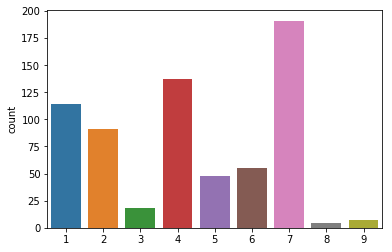

In [152]:
sns.countplot(x=y_test)

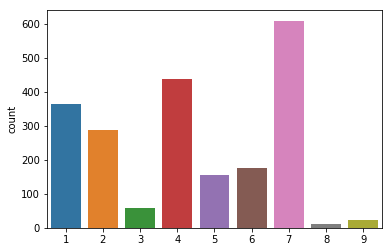

In [153]:
sns.countplot(x=y_train)

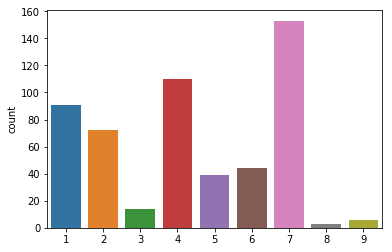

In [180]:
sns.countplot(x=y_cv)

In [137]:
X_train.shape

(2124, 5)

In [129]:
X_test.shape

(665, 5)

In [130]:
X_cv.shape

(532, 5)

In [132]:
X_cv.head()

,ID,Gene,Variation,Class,Text
1516,1516,ALK,E1384K,7,oncogenic property anaplastic lymphoma kinase ...
2897,2897,BRCA2,K607T,6,purpose rare missense substitutions frame dele...
2680,2680,BRCA1,M18K,6,germline mutations breast cancer 1 brca1 gene ...
2809,2809,BRCA2,D1352Y,6,twenty percent individuals strong family perso...
2590,2590,BRCA1,L28P,6,germline mutations breast cancer 1 brca1 gene ...


In [184]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

cv = CountVectorizer()
le = LabelEncoder()
ohe = OneHotEncoder()

cv_gene_train = cv.fit_transform(X_train['Gene'])
cv_gene_test = cv.transform(X_test['Gene'])
cv_gene_cv = cv.transform(X_cv['Gene'])
cv_gene_cv.shape


(532, 235)

## Executing SGD Classifier and Calibrated Classifier (To get probability out of SGD) to just Gene field

In [197]:
#To not display Warning messages use the below 2 lines
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

for alpha in [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    sgd_model = SGDClassifier(loss='log',alpha=alpha,max_iter=1000,tol=None)
    calib_model = CalibratedClassifierCV(base_estimator=sgd_model,method='sigmoid')

    sgd_model.fit(cv_gene_train,y_train)

    calib_model.fit(cv_gene_train,y_train)

    predict_y = calib_model.predict_proba(cv_gene_cv)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,predict_y)))
    

Value of Alpha is:1e-06 its Logloss is :1.2010426481257523
Value of Alpha is:1e-05 its Logloss is :1.180548253326079
Value of Alpha is:0.0001 its Logloss is :1.1697891290855822
Value of Alpha is:0.001 its Logloss is :1.2140594961601656
Value of Alpha is:0.01 its Logloss is :1.326242618708104
Value of Alpha is:0.1 its Logloss is :1.416471887169246
Value of Alpha is:1 its Logloss is :1.4632743222463458
Value of Alpha is:10 its Logloss is :1.469975504047732
Value of Alpha is:100 its Logloss is :1.4708646923808086


In [202]:
#get log loss for train, test and CV for Alpha = 0.0001 (best above)

sgd_model = SGDClassifier(loss='log',alpha=0.0001,max_iter=1000,tol=None)
calib_model = CalibratedClassifierCV(base_estimator=sgd_model,method='sigmoid')

sgd_model.fit(cv_gene_train,y_train)
calib_model.fit(cv_gene_train,y_train)
    
predict_y = calib_model.predict_proba(cv_gene_train)
print("Logloss for Train is :"+str(log_loss(y_train,predict_y)))
predict_y = calib_model.predict_proba(cv_gene_cv)
print("Logloss for CV is :"+str(log_loss(y_cv,predict_y)))
predict_y = calib_model.predict_proba(cv_gene_test)
print("Logloss for Test is :"+str(log_loss(y_test,predict_y)))



Logloss for Train is :0.9997870558759612
Logloss for CV is :1.169807325458577
Logloss for Test is :1.1952809925890648


In [207]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv_variation_train = cv.fit_transform(X_train['Variation'])
cv_variation_test = cv.transform(X_test['Variation'])
cv_variation_cv = cv.transform(X_cv['Variation'])
cv_variation_cv.shape

(532, 1967)

In [209]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

for alpha in [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    sgd_model = SGDClassifier(loss='log',alpha=alpha,max_iter=1000,tol=None)
    calib_model = CalibratedClassifierCV(base_estimator=sgd_model,method='sigmoid')

    calib_model.fit(cv_variation_train,y_train)

    predict_y = calib_model.predict_proba(cv_variation_cv)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,predict_y)))

Value of Alpha is:1e-06 its Logloss is :1.6921372586522256
Value of Alpha is:1e-05 its Logloss is :1.6897435655810737
Value of Alpha is:0.0001 its Logloss is :1.6847886827409004
Value of Alpha is:0.001 its Logloss is :1.6857074818228526
Value of Alpha is:0.01 its Logloss is :1.6944579871101069
Value of Alpha is:0.1 its Logloss is :1.7168255440068503
Value of Alpha is:1 its Logloss is :1.7246608293021317
Value of Alpha is:10 its Logloss is :1.7254511447879042
Value of Alpha is:100 its Logloss is :1.7255825826303197


In [211]:
#get log loss for train, test and CV for Alpha = 0.0001 (best above)

sgd_model = SGDClassifier(loss='log',alpha=0.0001,max_iter=1000,tol=None)
calib_model = CalibratedClassifierCV(base_estimator=sgd_model,method='sigmoid')

#we dont need to fit SGD model seperately as it is embedded inside calib model
calib_model.fit(cv_variation_train,y_train)
    
predict_y = calib_model.predict_proba(cv_variation_train)
print("Logloss for Train is :"+str(log_loss(y_train,predict_y)))
predict_y = calib_model.predict_proba(cv_variation_cv)
print("Logloss for CV is :"+str(log_loss(y_cv,predict_y)))
predict_y = calib_model.predict_proba(cv_variation_test)
print("Logloss for Test is :"+str(log_loss(y_test,predict_y)))


Logloss for Train is :0.7983152091540072
Logloss for CV is :1.6847867255064528
Logloss for Test is :1.7357372555294175


In [214]:
from sklearn.feature_extraction.text import CountVectorizer

text_cv = CountVectorizer(min_df=3)

cv_text_train = text_cv.fit_transform(X_train['Text'])
cv_text_test = text_cv.transform(X_test['Text'])
cv_text_cv = text_cv.transform(X_cv['Text'])
cv_text_cv.shape

(532, 53077)

In [215]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

for alpha in [0.0001,0.001,0.01,0.1,1,10,100]:
    sgd_model = SGDClassifier(loss='log',alpha=alpha,max_iter=1000,tol=None)
    calib_model = CalibratedClassifierCV(base_estimator=sgd_model,method='sigmoid')

    calib_model.fit(cv_text_train,y_train)

    predict_y = calib_model.predict_proba(cv_text_cv)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,predict_y)))

Value of Alpha is:0.0001 its Logloss is :1.3096627976027757
Value of Alpha is:0.001 its Logloss is :1.3225512978248155
Value of Alpha is:0.01 its Logloss is :1.2787904373133927
Value of Alpha is:0.1 its Logloss is :1.1734805468972214
Value of Alpha is:1 its Logloss is :1.1516398260090535
Value of Alpha is:10 its Logloss is :1.177914439834381
Value of Alpha is:100 its Logloss is :1.2943870781372522


In [225]:
def get_log_loss(X_train,X_test,y_train,y_test,model):
    cal_model = CalibratedClassifierCV(base_estimator = model, method = 'sigmoid')
    
    cal_model.fit(X_train,y_train)
    y_pred = cal_model.predict_proba(X_test)
    
    return(log_loss(y_test,y_pred))

# Combining the 3 features to for stacked final X

In [221]:
from scipy.sparse import hstack
X_train_ohe = hstack([cv_gene_train,cv_variation_train,cv_text_train])
X_cv_ohe = hstack([cv_gene_cv,cv_variation_cv,cv_text_cv])
X_test_ohe = hstack([cv_gene_test,cv_variation_test,cv_text_test])

print(X_train_ohe.shape)
print(X_cv_ohe.shape)
print(X_test_ohe.shape)

(2124, 55279)
(532, 55279)
(665, 55279)


# Trying Various machine learning models to get optimal log loss

## Naive Bayes

In [228]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

for alpha in [0.0001,0.001,0.01,0.1,1,10,100]:
    base_model = MultinomialNB(alpha=alpha)
    calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

    calib_model.fit(X_train_ohe,y_train)

    y_pred = calib_model.predict_proba(X_cv_ohe)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,y_pred)))

Value of Alpha is:0.0001 its Logloss is :1.2697563505857408
Value of Alpha is:0.001 its Logloss is :1.2841696313184903
Value of Alpha is:0.01 its Logloss is :1.285857385710172
Value of Alpha is:0.1 its Logloss is :1.278851844558869
Value of Alpha is:1 its Logloss is :1.2933769962227357
Value of Alpha is:10 its Logloss is :1.3781198684914007
Value of Alpha is:100 its Logloss is :1.6873676343265525


### Calculating Log Loss for test and CV  using best Alpha

In [231]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = 0.1

base_model = MultinomialNB(alpha=alpha)
calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

calib_model.fit(X_train_ohe,y_train)

y_pred = calib_model.predict_proba(X_train_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Train is :"+str(log_loss(y_train,y_pred)))
y_pred = calib_model.predict_proba(X_cv_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for CV is :"+str(log_loss(y_cv,y_pred)))
y_pred = calib_model.predict_proba(X_test_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Test is :"+str(log_loss(y_test,y_pred)))

Value of Alpha is:0.1 its Logloss for Train is :1.0078860029174828
Value of Alpha is:0.1 its Logloss for CV is :1.278851844558869
Value of Alpha is:0.1 its Logloss for Test is :1.3044806587056048


## KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier

for alpha in [3,5,11,15,21,25,31,35,51,91,101]:
    base_model = KNeighborsClassifier(n_neighbors=alpha)
    calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

    calib_model.fit(X_train_ohe,y_train)

    y_pred = calib_model.predict_proba(X_cv_ohe)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,y_pred)))

Value of Alpha is:3 its Logloss is :1.2474923858346927
Value of Alpha is:5 its Logloss is :1.273955615689236
Value of Alpha is:11 its Logloss is :1.3099404362179219
Value of Alpha is:15 its Logloss is :1.3371163258374714
Value of Alpha is:21 its Logloss is :1.3656946344090053
Value of Alpha is:25 its Logloss is :1.3802224161342944
Value of Alpha is:31 its Logloss is :1.3937243491516702
Value of Alpha is:35 its Logloss is :1.4051027951969353
Value of Alpha is:51 its Logloss is :1.4394446399024912
Value of Alpha is:91 its Logloss is :1.4769082573342291
Value of Alpha is:101 its Logloss is :1.4887776227076785


In [232]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = 11

base_model = KNeighborsClassifier(n_neighbors=alpha)
calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

calib_model.fit(X_train_ohe,y_train)

y_pred = calib_model.predict_proba(X_train_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Train is :"+str(log_loss(y_train,y_pred)))
y_pred = calib_model.predict_proba(X_cv_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for CV is :"+str(log_loss(y_cv,y_pred)))
y_pred = calib_model.predict_proba(X_test_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Test is :"+str(log_loss(y_test,y_pred)))

Value of Alpha is:11 its Logloss for Train is :1.1250515372272583
Value of Alpha is:11 its Logloss for CV is :1.3099404362179219
Value of Alpha is:11 its Logloss for Test is :1.2987107886574805


## Logistic Regression - Balanced Class weight

In [234]:
from sklearn.linear_model import SGDClassifier

for alpha in [0.0001,0.001,0.01,0.1,1,10,100]:
    base_model = SGDClassifier(loss='log',alpha=alpha, max_iter = 1000, class_weight = 'balanced')
    calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

    calib_model.fit(X_train_ohe,y_train)

    y_pred = calib_model.predict_proba(X_cv_ohe)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,y_pred)))

Value of Alpha is:0.0001 its Logloss is :1.314112062266432
Value of Alpha is:0.001 its Logloss is :1.3060885504475845
Value of Alpha is:0.01 its Logloss is :1.2759842889273074
Value of Alpha is:0.1 its Logloss is :1.1688850637131516
Value of Alpha is:1 its Logloss is :1.1474882313329104
Value of Alpha is:10 its Logloss is :1.1752471398164033
Value of Alpha is:100 its Logloss is :1.3089566514938429


In [239]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = 1

base_model = SGDClassifier(loss='log',alpha=alpha, max_iter = 1000, class_weight = 'balanced')
calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

calib_model.fit(X_train_ohe,y_train)

y_pred = calib_model.predict_proba(X_train_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Train is :"+str(log_loss(y_train,y_pred)))
y_pred = calib_model.predict_proba(X_cv_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for CV is :"+str(log_loss(y_cv,y_pred)))
y_pred = calib_model.predict_proba(X_test_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Test is :"+str(log_loss(y_test,y_pred)))

Value of Alpha is:1 its Logloss for Train is :0.7742085106742166
Value of Alpha is:1 its Logloss for CV is :1.1467572148370693
Value of Alpha is:1 its Logloss for Test is :1.1839966537821676


## Logistic Regression - no balancing

In [235]:
from sklearn.linear_model import SGDClassifier

for alpha in [0.0001,0.001,0.01,0.1,1,10,100]:
    base_model = SGDClassifier(loss='log',alpha=alpha, max_iter = 1000)
    calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

    calib_model.fit(X_train_ohe,y_train)

    y_pred = calib_model.predict_proba(X_cv_ohe)
    print("Value of Alpha is:"+str(alpha)+" its Logloss is :"+str(log_loss(y_cv,y_pred)))

Value of Alpha is:0.0001 its Logloss is :1.311171713379975
Value of Alpha is:0.001 its Logloss is :1.3059598917605175
Value of Alpha is:0.01 its Logloss is :1.2818422194733738
Value of Alpha is:0.1 its Logloss is :1.1726981137874666
Value of Alpha is:1 its Logloss is :1.15172072016878
Value of Alpha is:10 its Logloss is :1.1779264981450221
Value of Alpha is:100 its Logloss is :1.2943927201853942


In [240]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = 1

base_model = SGDClassifier(loss='log',alpha=alpha, max_iter = 1000)
calib_model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid')

calib_model.fit(X_train_ohe,y_train)

y_pred = calib_model.predict_proba(X_train_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Train is :"+str(log_loss(y_train,y_pred)))
y_pred = calib_model.predict_proba(X_cv_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for CV is :"+str(log_loss(y_cv,y_pred)))
y_pred = calib_model.predict_proba(X_test_ohe)
print("Value of Alpha is:"+str(alpha)+" its Logloss for Test is :"+str(log_loss(y_test,y_pred)))

Value of Alpha is:1 its Logloss for Train is :0.7777615294865157
Value of Alpha is:1 its Logloss for CV is :1.1519808566389202
Value of Alpha is:1 its Logloss for Test is :1.1825423888135564
